<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/mixed_effects_model_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed Effect Model Tutorial
(Fayyaz Minhas)
## Objective
Understand the application of negative binomial and Tweedie mixed-effect models in scenarios with overdispersed count data and data that could benefit from the flexibility of Tweedie distribution, respectively.

## Scenario
Suppose we are studying the effect of an environmental factor (x) on the count of a particular event (y), measured across different locations (p) with multiple observations per location. We suspect overdispersion in the count data and potential zero inflation, making the negative binomial and Tweedie distributions appropriate choices.

## Step 1: Install and Load Necessary Packages
Ensure glmmTMB and ggplot2 are installed and loaded into your R session.

In [37]:
# install.packages(c("glmmTMB", "ggplot2"))
library(glmmTMB)
library(ggplot2)


## Step 2: Generate Synthetic Data
We'll generate synthetic data that mimics overdispersion in count data.

In [38]:
set.seed(123) # For reproducibility
n_locations <- 50
n_observations <- 200

# Generate location IDs
location_id <- rep(1:n_locations, each = n_observations)

# Simulate environmental factor (x) randomly
environmental_factor <- runif(n_locations * n_observations, 0, 5)

# Random effects for locations
random_effects <- rnorm(n_locations, 0, 2)
location_effect <- random_effects[location_id]

# Generate count data (y) with overdispersion
y <- rnbinom(n_locations * n_observations, size = 2, mu = exp(2 - 2 * environmental_factor + location_effect))

data <- data.frame(location_id, environmental_factor, y)


## Step 3: Fit Mixed-Effect Models
Negative Binomial Regression

In [39]:
nb_model <- glmmTMB(y ~ 1 + environmental_factor + (1|location_id), data = data, family = nbinom2)
summary(nb_model)
tweedie_model <- glmmTMB(y ~ 1 + environmental_factor + (1|location_id), data = data, family = tweedie)
summary(tweedie_model)


 Family: nbinom2  ( log )
Formula:          y ~ 1 + environmental_factor + (1 | location_id)
Data: data

     AIC      BIC   logLik deviance df.resid 
 16061.3  16090.1  -8026.6  16053.3     9996 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 location_id (Intercept) 3.675    1.917   
Number of obs: 10000, groups:  location_id, 50

Dispersion parameter for nbinom2 family ():  1.9 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.98372    0.27325    7.26 3.88e-13 ***
environmental_factor -2.06821    0.02336  -88.55  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Family: tweedie  ( log )
Formula:          y ~ 1 + environmental_factor + (1 | location_id)
Data: data

     AIC      BIC   logLik deviance df.resid 
 17547.8  17583.8  -8768.9  17537.8     9995 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 location_id (Intercept) 3.709    1.926   
Number of obs: 10000, groups:  location_id, 50

Dispersion parameter for tweedie family (): 2.76 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.96265    0.27478    7.14 9.15e-13 ***
environmental_factor -2.04792    0.02102  -97.42  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Step 4: Generate Plots
To visualize the effects and clarify the concept of mixed-effect models, we can plot the observed counts vs. the environmental factor, highlighting the random effects by location.

### Observed Counts vs. Environmental Factor




`geom_smooth()` using formula = 'y ~ x'


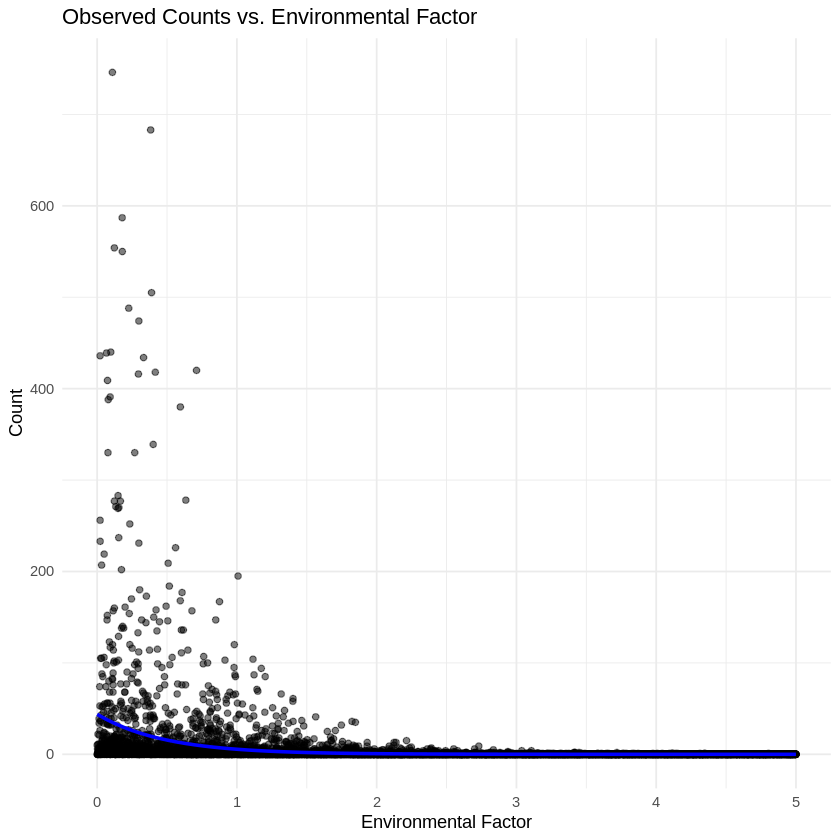

In [40]:
ggplot(data, aes(x = environmental_factor, y = y)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "glm", method.args = list(family = "quasipoisson"), se = FALSE, color = "blue") +
  labs(title = "Observed Counts vs. Environmental Factor", x = "Environmental Factor", y = "Count") +
  theme_minimal()


This plot shows the raw data with a generalized linear model fit, approximating the expected trend. The spread of points around the trend line hints at overdispersion and the potential suitability of negative binomial or Tweedie models.

### Visualizing Random Effects

While it's challenging to directly visualize random effects, we can examine the variability in counts by location.

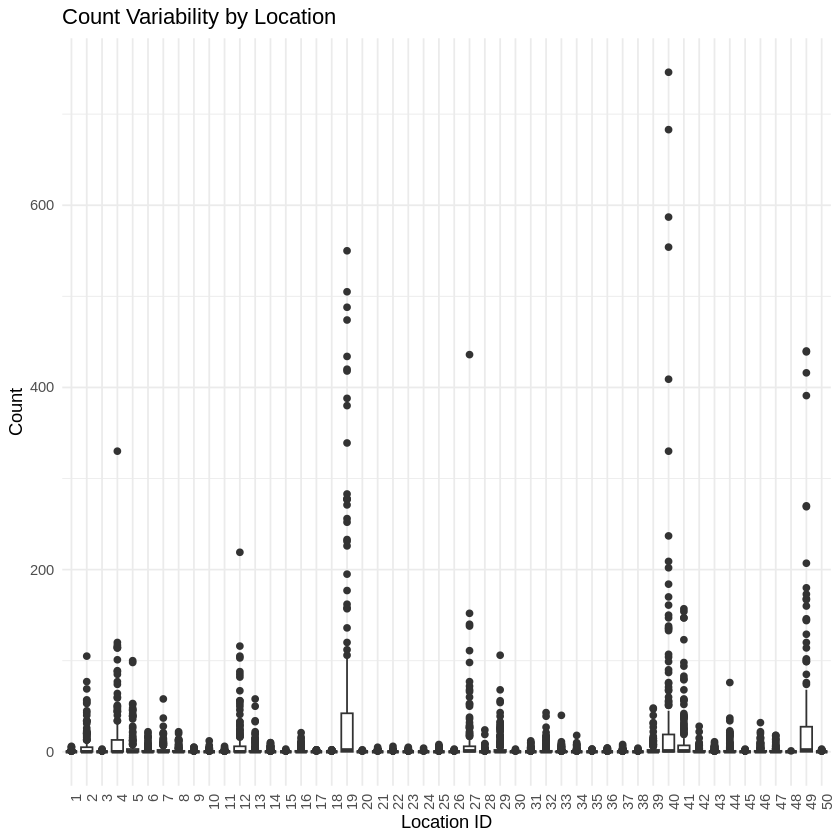

In [41]:
ggplot(data, aes(x = factor(location_id), y = y)) +
  geom_boxplot() +
  labs(title = "Count Variability by Location", x = "Location ID", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


This boxplot highlights the variability in counts across locations, underlying the importance of including random effects in our model to account for such variability.

## Conclusion
This tutorial demonstrates how to fit and interpret negative binomial and Tweedie mixed-effect models using the glmmTMB package in R, addressing overdispersion and the flexibility to model various data distributions. The plots provide insights into the data structure and the rationale behind choosing mixed-effect models for complex data analysis.